### Step 1

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/home/denniss/Downloads/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Step 2
Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

In [3]:
# first approach: create filter
mask = df.Survived == 1
survived = df[mask]['Survived']
survived.sum()

342

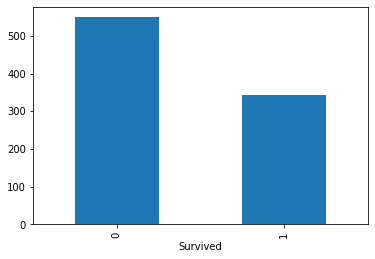

In [4]:
# second approach: do a groupby
df.groupby(['Survived'])['Survived'].count().plot.bar()

### Step 3
Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [5]:
classes = df.groupby(['Survived', 'Pclass'])['Pclass'].count()
classes = classes.unstack() # Create DataFrame with Pclasses as cols
classes[1] / classes[1].sum() # get surviving percentages for Pclass==1

Survived
0    0.37037
1    0.62963
Name: 1, dtype: float64

### Step 4
Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

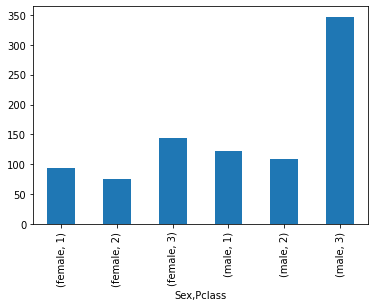

In [6]:
# first approach
df.groupby(['Sex', 'Pclass'])['PassengerId'].count().plot.bar()

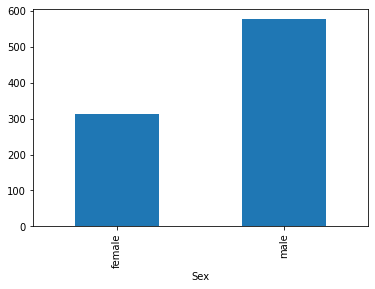

In [7]:
# second approach: two separate plots
df.groupby(['Sex'])['Sex'].count().plot.bar()

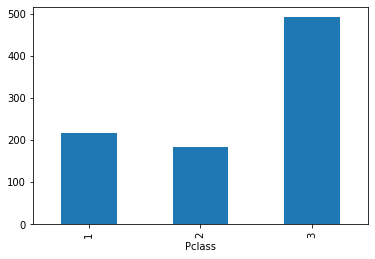

In [8]:
df.groupby(['Pclass'])['Sex'].count().plot.bar()

### Step 5
Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

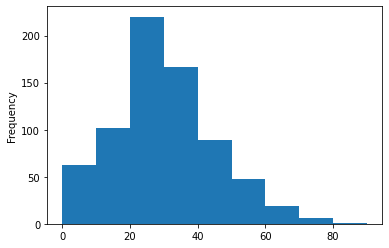

In [9]:
df['Age'].plot.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

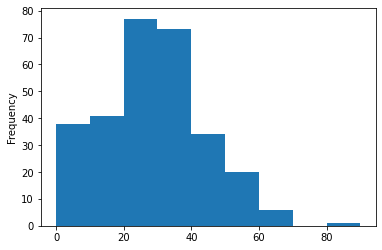

In [10]:
survived = df[df.Survived == 1]
survived['Age'].plot.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

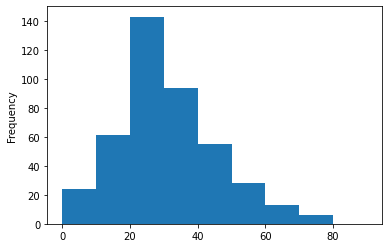

In [11]:
died = df[df.Survived == 0]
died['Age'].plot.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

### Step 6
Calculate the average age for survived and drowned passengers separately.

In [12]:
died['Age'].mean()

30.62617924528302

In [13]:
survived['Age'].mean()

28.343689655172415

### Step 7
Replace missing age values by the mean age.

In [14]:
# Inspect missing age values
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [15]:
# Fill missing age values with mean, inspect
dff = df.fillna(value={'Age': df['Age'].mean()})
dff[dff['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Step 8
Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [16]:
dfff = df.groupby(['Survived', 'Pclass', 'Sex'])['PassengerId'].count()
dfff.unstack(0)

Survived         0   1
Pclass Sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47